In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../DataAccess/Datasets/Reviews.csv')
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
print(f'df size: {df.size}')
df.isna().sum()

df size: 5684540


Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
# df = df.dropna()

In [ ]:
# Filter rows which are not null

df = df[df['Summary'].notna()]
# df = df[~df['Summary'].isna()]

In [7]:
# Drop rows which are null
df = df.dropna(subset=['Summary'])

In [8]:
print(f'df size: {df.size}')
df.isna().sum()

df size: 5684270


Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    0
Text                       0
dtype: int64

In [9]:
df['Status'] = df['Score'].apply(lambda x: 'Positive' if 3<x<=5 else 'Negative')
df['Status_Int'] = df['Score'].apply(lambda x: 1 if 3<x<=5 else 0)
df[['Status', 'Status_Int']]

,Status,Status_Int
0,Positive,1
1,Negative,0
2,Positive,1
3,Negative,0
4,Positive,1
...,...,...
568449,Positive,1
568450,Negative,0
568451,Positive,1
568452,Positive,1


[]

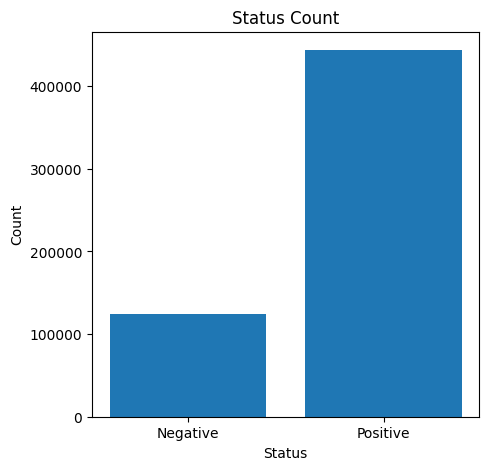

In [ ]:
df_status = df.groupby('Status').size().reset_index(name='Count')

plt.figure(figsize=(5,5))
plt.bar(df_status['Status'], df_status['Count'])
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status Count')
plt.show()

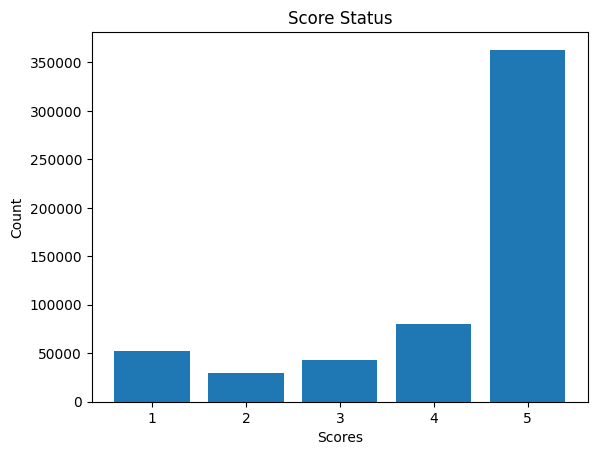

In [11]:
df_score = df.groupby('Score').size().reset_index(name= 'Count')

plt.bar(df_score['Score'], df_score['Count'])
plt.xlabel('Scores')
plt.ylabel('Count')
plt.title('Score Status')
plt.show()

In [12]:
# pip install transformers datasets scikit-learn
# pip install tf-keras

In [13]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
import tensorflow as tf

f:\Python\FastAPI\env_bert\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [15]:
X= df['Text'].tolist()
y= df['Status_Int'].tolist()
epochs=1
batch_size=64

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

encoded_train = tokenizer(X_train, padding=True, truncation=True, max_length=128, return_tensors='tf', return_attention_mask=True)
encoded_test = tokenizer(X_test, padding=True, truncation=True, max_length=128, return_tensors='tf', return_attention_mask=True)

In [16]:
encoded_train

{'input_ids': <tf.Tensor: shape=(454741, 128), dtype=int32, numpy=
array([[  101, 11937, 21756, ...,     0,     0,     0],
       [  101,  2198,  1059, ...,  1045,  2293,   102],
       [  101,  1045,  2031, ...,     0,     0,     0],
       ...,
       [  101,  2057,  2507, ..., 12057,  5186,   102],
       [  101,  2021, 16047, ..., 26207, 12176,   102],
       [  101,  2057,  2031, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(454741, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [24]:
train_input_ids = encoded_train['input_ids']
train_attention_mask = encoded_train['attention_mask']

X_train={
    'input_ids': train_input_ids,
    'attention_mask': train_attention_mask
}

y_train = tf.convert_to_tensor(y_train)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)

In [25]:
test_input_ids=encoded_test['input_ids']
test_attention_mask=encoded_test['attention_mask']

X_test={
    'input_ids': test_input_ids,
    'attention_mask': test_attention_mask
}

y_test = tf.convert_to_tensor(y_test)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

In [28]:
# Create Hugging Face-compatible optimizer & scheduler

from transformers import create_optimizer

num_train_steps = len(train_input_ids) // batch_size * epochs
print(f'num_train_steps : {num_train_steps}')

optimizer, lr_schedul = create_optimizer(
    init_lr=5e-5, 
    num_train_steps=num_train_steps, # adjust based on your dataset
    num_warmup_steps=100  # small warm-up to stabilize training
    )

num_train_steps : 7105


In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
# import os
# import tensorflow as tf

# class SaveModelCallback(tf.keras.callbacks.Callback):
#     def __init__(self, base_path='./checkpoints'):
#         super().__init__()
#         self.base_path = base_path
#         os.makedirs(base_path, exist_ok=True)
#         self._implements_train_batch_hooks = False  # ✅ defined as an attribute, not a method

#     def on_epoch_end(self, epoch, logs=None):
#         save_path = os.path.join(self.base_path, f'epoch_{epoch+1}')
#         self.model.save_pretrained(save_path)
#         tokenizer.save_pretrained(save_path)
#         print(f"\n✅ Saved model at {save_path}")

# save_callback = SaveModelCallback()

In [ ]:
history = model.fit(
    train_dataset, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=test_dataset
    #callbacks=[save_callback]
    )